# Nome: Pedro Magalhães da Silva

# Análise dos planos de governo dos candidatos a presidência do Brasil em 2022

In [2]:
pip install pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 3.0 MB/s 
     |████████████████████████████████| 5.6 MB 6.4 MB/s 
     |████████████████████████████████| 142 kB 64.6 MB/s 
     |████████████████████████████████| 3.1 MB 41.3 MB/s 
     |████████████████████████████████| 4.0 MB 46.8 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [1]:
import pdfplumber
from PIL import Image
import re
from collections import Counter
import networkx as nx
import numpy as np
import nltk
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
import plotly.graph_objects as go
from plotly.subplots import make_subplots

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
def func_analise(ArquivoPdf, candidato):
    pdf = pdfplumber.open('/content/planos_de_governo/' + ArquivoPdf + '.pdf')
    contapage = len(pdf.pages)
    print(f'O arquivo PDF do candidato(a) a presidência {candidato} tem {contapage} páginas.')
    print()
    print('Segue pequeno trecho da proposta de governo do candidato/a:')
    print()
    print(pdf.pages[5].extract_text())

### Trecho do plano de Governo do Eymael

In [21]:
func_analise(candidatos[0], candidatos[0])

O arquivo PDF do candidato(a) a presidência eymael tem 9 páginas.

Segue pequeno trecho da proposta de governo do candidato/a:

 
 
 
a)  O ESTADO NECESSÁRIO: dotar todos os segmentos do serviço público federal 
dos recursos humanos, equipamentos e tecnologia, necessários. 
 
b)  Estabelecer,  em  todos  os  segmentos  do  Serviço  Público  Federal,  plano  de 
carreira, propiciando motivação funcional e conquista de talentos. 
 
c)   Modernização do serviço público federal e universalização de sua qualidade, 
com  a  adoção  conjunta  de  políticas  salariais  competitivas,  programa  de 
incentivos motivacionais, atualização permanente de equipamentos operacionais 
e capacitação funcional continuada. 
 
d)  Criar  mecanismos  que  garantam  transparência  no  setor  público  federal  e  a 
responsabilidade de seus agentes, no desempenho de suas funções. 
 
e)  Redução drástica do número de Ministérios hoje existentes, mas incluindo, entre 
os Ministérios remanescentes, o Ministério d

### Trecho do plano de Governo do Bolsonaro

In [23]:
func_analise(candidatos[6], candidatos[6])

O arquivo PDF do candidato(a) a presidência bolsonaro tem 48 páginas.

Segue pequeno trecho da proposta de governo do candidato/a:

É preciso ter um olhar amplo para 
antever e compreender a direção 
provável do mundo, por meio de 
fatos portadores de futuro, e como o 
Brasil pode-se inserir nesse contexto 
de forma a proteger seus cidadãos
por eixos para facilitar sua construção e a transparência  Nossa Nação, por meio do governo Bolsonaro, tem 
em seus propósitos. Em suma, ela mostra “o que fazer”.  essa capacidade por intermédio de acordos bilaterais e 
Dentro desta premissa, precisamos estar à frente de  multilaterais. Os exemplos são muitos, como a Organização 
nossas necessidades para propiciar um Estado que  para a Cooperação e Desenvolvimento Econômico (OCDE) 
possa responder os desaﬁ os presentes e futuros, onde o  e o The European Free Trade Area (EFTA), dentre outros.
talento da população brasileira (entenda-se capacitação), 
como um novo fator de produção em uma economia 4.

### Trecho do plano de Governo do Lula

In [24]:
func_analise(candidatos[7], candidatos[7])

O arquivo PDF do candidato(a) a presidência lula tem 21 páginas.

Segue pequeno trecho da proposta de governo do candidato/a:

 
preciso fortalecer a educação pública universal, democrática, gratuita, de qualidade, socialmente 
referenciada, laica e inclusiva, com valorização e reconhecimento público de seus profissionais.  
23. A saúde, o direito à vida e o Sistema Único de Saúde (SUS) têm sido tratados com descaso pelo atual 
governo. Faltam investimentos, ações preventivas, profissionais de saúde, consultas, exames e 
medicamentos. É urgente dar condições ao SUS para retomar o atendimento às demandas que 
foram represadas durante a pandemia, atender as pessoas com sequelas da covid-19 e retomar o 
reconhecido programa nacional de vacinação. Não fossem o SUS e os corajosos trabalhadores e 
trabalhadoras da saúde, a irresponsabilidade do atual governo na pandemia teria custado ainda 
mais vidas. 
24. Nos governos Lula e Dilma, a saúde foi tratada como uma política pública central, com

In [6]:
#criar lista de candidados a partir dos arquivos pdf da pasta planos_de_governo
def lista_candidatos():
    import os
    lista = []
    for file in os.listdir('/content/planos_de_governo'):
        if file.endswith('.pdf'):
            lista.append(file)
    #remover o .pdf do nome do arquivo
    lista = [x.replace('.pdf', '') for x in lista]
    return lista

In [7]:
#Realizando tratamento dos texto para retirar os caracteres especiais
def tratamento_texto(ArquivoPdf):
    texto_limpo = []
    pdf = pdfplumber.open(ArquivoPdf)
    contapage = len(pdf.pages)
    texto = ''
    for i in range(contapage):
        texto += pdf.pages[i].extract_text()
    texto = texto.lower()
    texto = re.sub(r'[^a-zA-Z\s]', '', texto, re.I | re.A)
    texto = re.findall(r'\w+', texto)
    for palavra in texto:
        if (palavra not in stopwords) & (len(palavra) > 3):
            texto_limpo.append(palavra)
    testo_limpo = texto_limpo.sort()
    texto_limpo = ' '.join(texto_limpo)
    texto_limpo = texto_limpo.strip()
    return texto_limpo

In [8]:
def vendotabela(ArquivoPdf):
    texto = tratamento_texto('/content/planos_de_governo/' + ArquivoPdf + '.pdf')
    palavras = texto.split()
    contagem = Counter(palavras)
    df = pd.DataFrame(contagem.most_common(20), columns=['Palavras', 'Contagem'])
    return df

In [9]:
#lista de candidatos criadas
candidatos = lista_candidatos()
candidatos

['eymael',
 'vera',
 'jefferson',
 'soraya',
 'roque',
 'simone',
 'bolsonaro',
 'lula',
 'ciro',
 'davila',
 'marcal',
 'sofia']

In [13]:
def wordcloud(ArquivoPdf,candidato):
    # criar wordcloud sem palavras duplicadas
    candidato = candidato.capitalize()
    texto = tratamento_texto('/content/planos_de_governo/' + ArquivoPdf + '.pdf')
    wordcloud = WordCloud(width=800, height=500,max_font_size=110, collocations=False).generate(texto)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'WordCloud do Plano de Governo do Candidato {candidato}')
    plt.axis('off')
    plt.show()

In [14]:
def plotar_grafico(ArquivoPdf, candidato):
    candidato = candidato.capitalize()
    df = vendotabela(ArquivoPdf)
    df.plot.bar(x='Palavras', y='Contagem', figsize=(10, 7))
    plt.title(f'Grafico do Plano de Governo do Candidato {candidato}')
    plt.show()

In [15]:
def plotar_grafo(ArquivoPdf, candidato):
    candidato = candidato.capitalize()
    texto = tratamento_texto('/content/planos_de_governo/' + ArquivoPdf + '.pdf')
    palavras = texto.split()
    contagem = Counter(palavras)
    df = pd.DataFrame(contagem.most_common(20), columns=['Palavras', 'Contagem'])
    G = nx.from_pandas_edgelist(df, source='Palavras', target='Contagem')
    G.add_nodes_from(nodes_for_adding=df['Palavras'].tolist())
    G = nx.Graph()
    for palavra in df['Palavras']:
        G.add_node(palavra)
    for palavra in df['Palavras']:
        for palavra2 in df['Palavras']:
            if palavra != palavra2:
                G.add_edge(palavra, palavra2)
    nx.draw(G, with_labels=True, node_size=1000, node_color='yellow', font_size=7, font_color='black')
    plt.title(f'Grafo do Plano de Governo do Candidato {candidato}')
    plt.show()


In [16]:
def wordcloud_geral_csv():
    #criar uma lista com todos os arquivos csv
    lista_csv = []
    for file in os.listdir('csv'):
        if file.endswith('.csv'):
            lista_csv.append(file)
    #criar uma lista com todos os textos dos arquivos csv
    lista_textos = []
    for file in lista_csv:
        df = pd.read_csv('/content/csv/' + file, sep=',')
        lista_textos.append(df['Palavras'].to_string())
    #juntar todos os textos em uma única string
    texto = ''
    for i in lista_textos:
        texto += str(i)
    #remover stopwords
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]','',texto)
    texto = re.sub(r'\d+','',texto)
    texto = re.sub(r'\s+',' ',texto)
    texto = texto.split()
    texto = [word for word in texto if word not in stopwords]
    texto = ' '.join(texto)
    #plotar wordcloud
    wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [17]:
def wordcloud_geral_pdf():
    #criar uma lista com todos os arquivos pdf
    lista_pdf = []
    for file in os.listdir('/content/planos_de_governo'):
        if file.endswith('.pdf'):
            lista_pdf.append(file)
    #criar uma lista com todos os textos dos arquivos pdf
    lista_textos = []
    for file in lista_pdf:
        with pdfplumber.open('/content/planos_de_governo/' + file) as pdf:
            for page in pdf.pages:
                text = page.extract_text()
                lista_textos.append(text)
    #juntar todos os textos em uma única string
    texto = ''
    for i in lista_textos:
        texto += str(i)
    #remover stopwords
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]','',texto)
    texto = re.sub(r'\d+','',texto)
    texto = re.sub(r'\s+',' ',texto)
    texto = texto.split()
    texto = [word for word in texto if word not in stopwords]
    texto = ' '.join(texto)
    #plotar wordcloud
    wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [18]:
def grafico_barras_geral():
    candidatos = []
    for file in os.listdir('csv'):
        if file.endswith('.csv'):
            candidatos.append(file)
    candidatos = [i.replace('.csv', '') for i in candidatos]
    fig = make_subplots(rows=6, cols=2, subplot_titles=candidatos)
    for candidato in candidatos:
        df = pd.read_csv(f'csv/{candidato}.csv')
        df = df.head(10)
        fig.add_trace(go.Bar(x=df['Palavras'], y=df['Contagem'], name=candidato), row=candidatos.index(candidato)//2+1, col=candidatos.index(candidato)%2+1)
        fig.update_layout(barmode='stack')
    fig.update_layout(height=1400, width=1400, title_text="Palavras mais frequentes")
    fig.update_xaxes(tickangle = -90)
    fig.show()

In [19]:
def grafico_somatorio():
    somatorio = []
    candidatos = []
    for file in os.listdir('csv'):
        if file.endswith('.csv'):
            candidatos.append(file)
    candidatos = [i.replace('.csv', '') for i in candidatos]
    for candidato in candidatos:
        df = pd.read_csv(f'csv/{candidato}.csv')
        df = df.head(10)
        somatorio.append({'candidato': candidato, 'somatorio' : df['Contagem'].sum()})
    somatorio = pd.DataFrame(somatorio)
    somatorio = somatorio.sort_values(by='somatorio', ascending=False)
    #grafico de barras usando seaborn
    plt.figure(figsize=(10,5))
    sns.barplot(x='candidato', y='somatorio', data=somatorio, palette='Blues_d', edgecolor='black', linewidth=1)
    plt.title('Plano de governo com mais palavras')
    plt.xticks(rotation=90)
    plt.show()

## Candidato Eymael

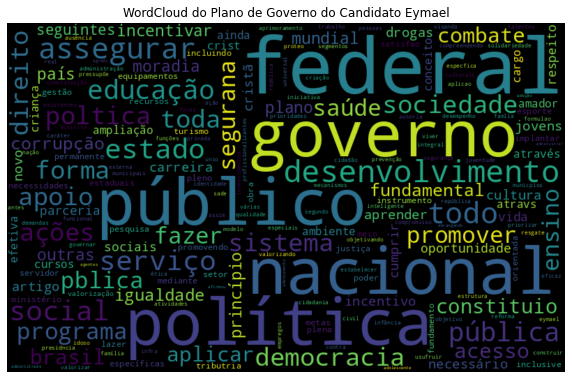

In [ ]:
wordcloud(candidatos[0], candidatos[0])

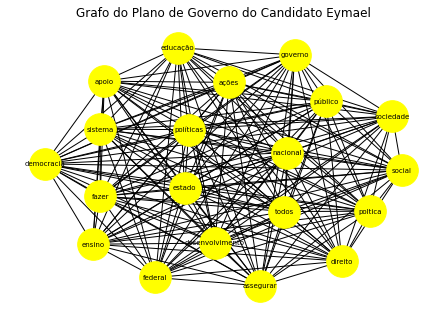

In [ ]:
plotar_grafo(candidatos[0], candidatos[0])

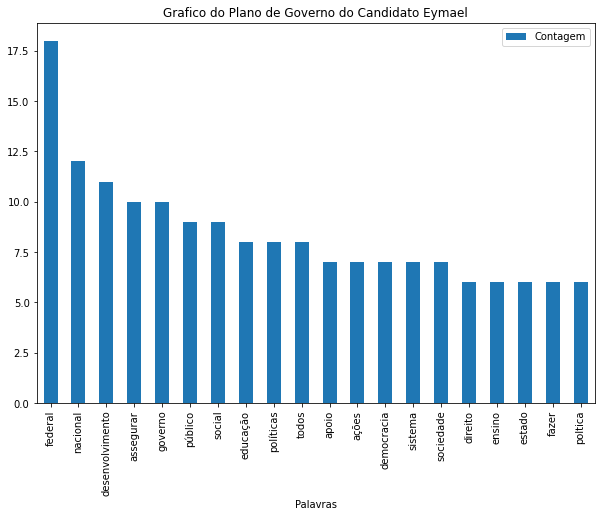

In [ ]:
plotar_grafico(candidatos[0], candidatos[0])

## Candidata Vera Lúcia


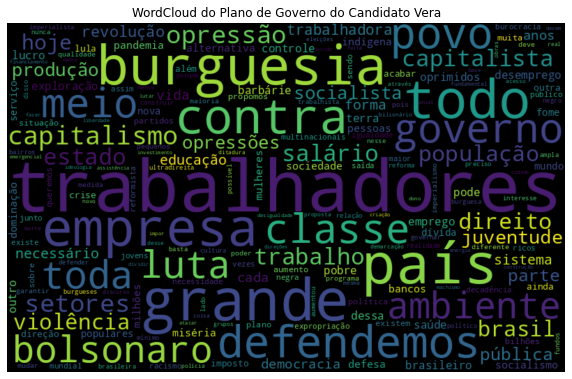

In [ ]:
wordcloud(candidatos[1], candidatos[1])

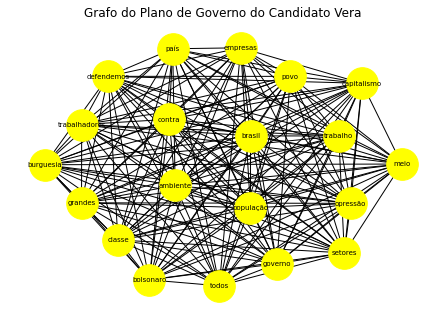

In [ ]:
plotar_grafo(candidatos[1], candidatos[1])

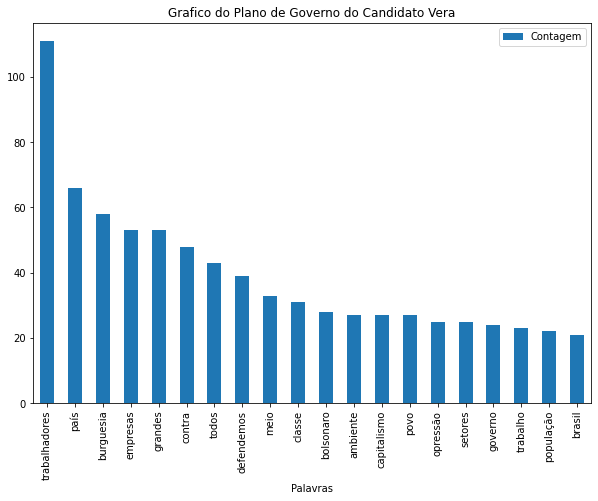

In [ ]:
plotar_grafico(candidatos[1], candidatos[1])

## Candidato Roberto Jefferson (teve seu registro negado em 1 de setembro de 2022 pelo TSE)

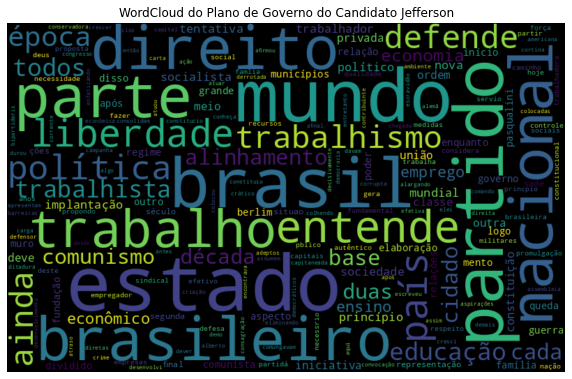

In [ ]:
wordcloud(candidatos[2], candidatos[2])

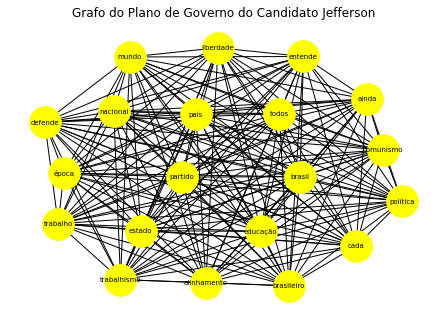

In [ ]:
plotar_grafo(candidatos[2], candidatos[2])

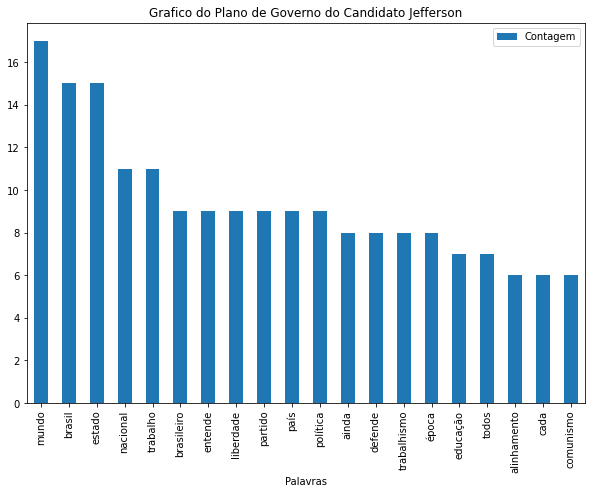

In [ ]:
plotar_grafico(candidatos[2], candidatos[2])

## Candidata Soraya Thronicke

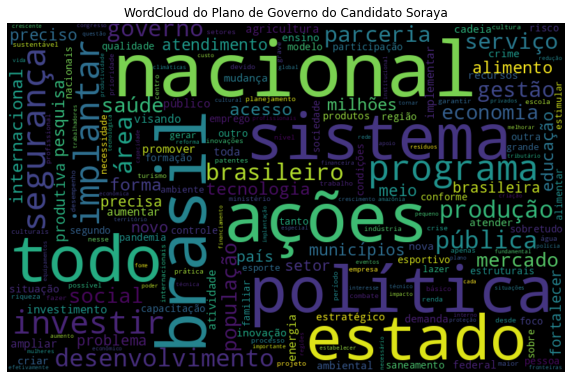

In [ ]:
wordcloud(candidatos[3], candidatos[3])

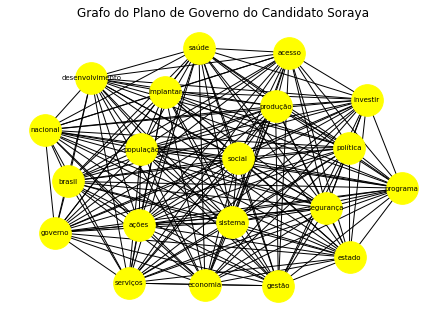

In [ ]:
plotar_grafo(candidatos[3], candidatos[3])

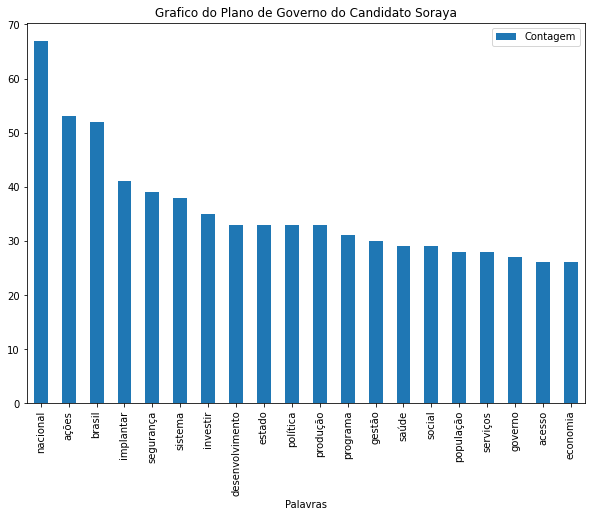

In [ ]:
plotar_grafico(candidatos[3], candidatos[3])



## Candidato Roque

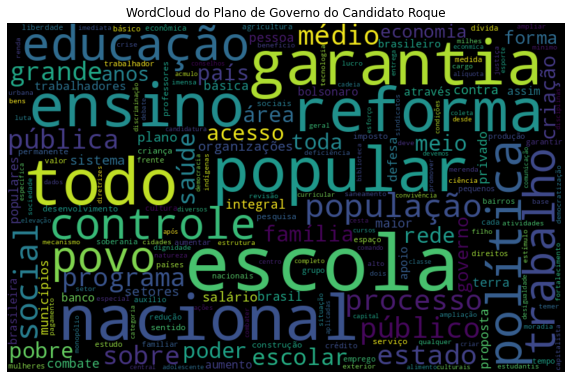

In [ ]:
wordcloud(candidatos[4], candidatos[4])

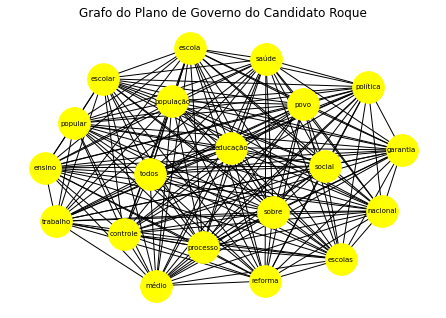

In [ ]:
plotar_grafo(candidatos[4], candidatos[4])

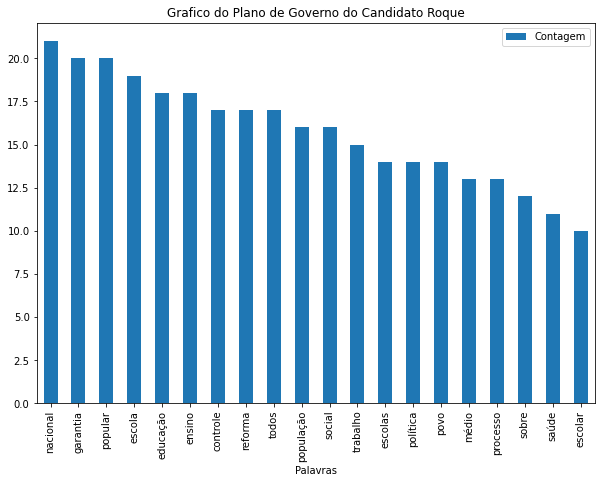

In [ ]:
plotar_grafico(candidatos[4], candidatos[4])

## Candidata Simone Tebet

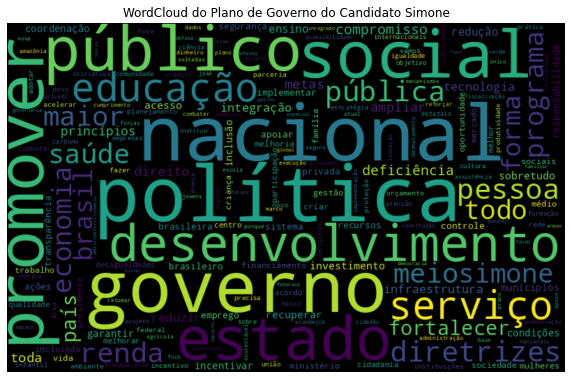

In [ ]:
wordcloud(candidatos[5], candidatos[5])

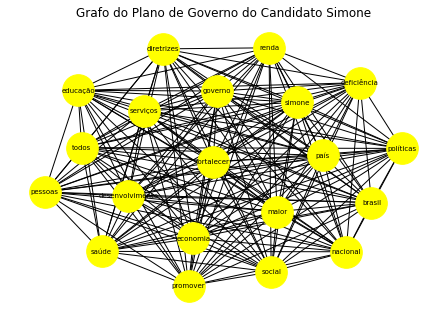

In [ ]:
plotar_grafo(candidatos[5], candidatos[5])

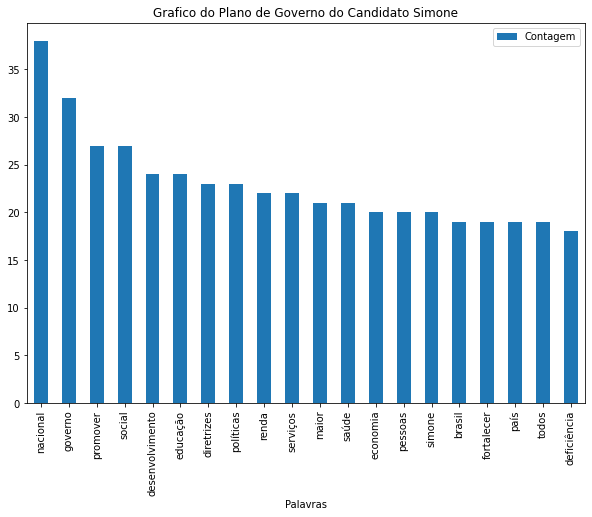

In [ ]:
plotar_grafico(candidatos[5], candidatos[5])

## Candidato Jair Bolsonaro

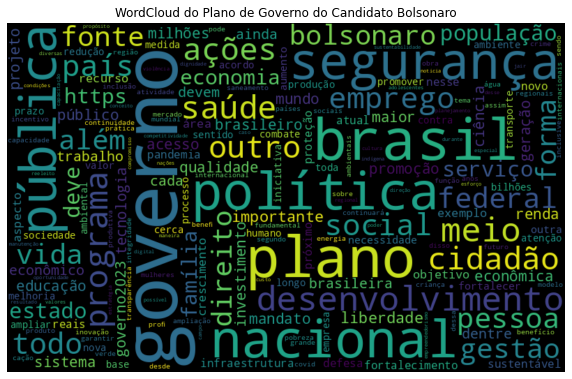

In [ ]:
wordcloud(candidatos[6], candidatos[6])

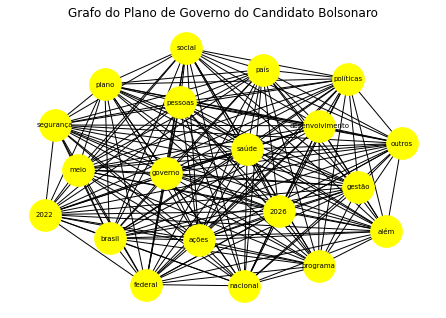

In [ ]:
plotar_grafo(candidatos[6], candidatos[6])

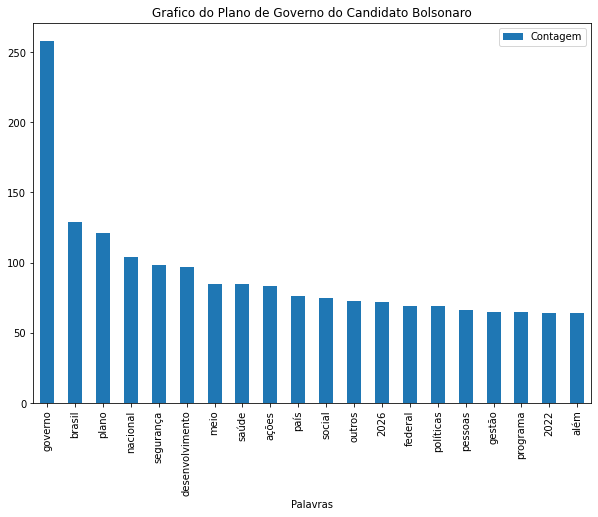

In [ ]:
plotar_grafico(candidatos[6], candidatos[6])

## Candidato Lula

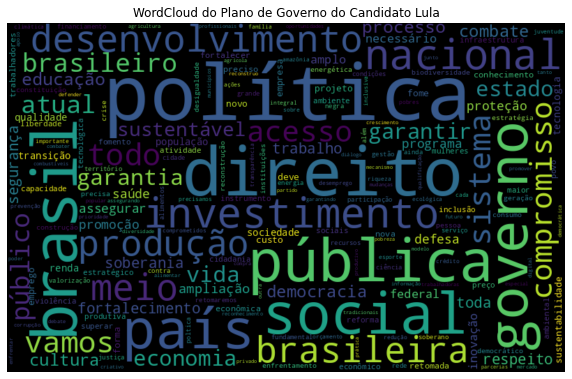

In [ ]:
wordcloud(candidatos[7], candidatos[7])

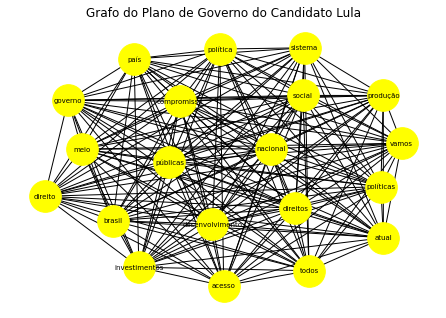

In [ ]:
plotar_grafo(candidatos[7], candidatos[7])

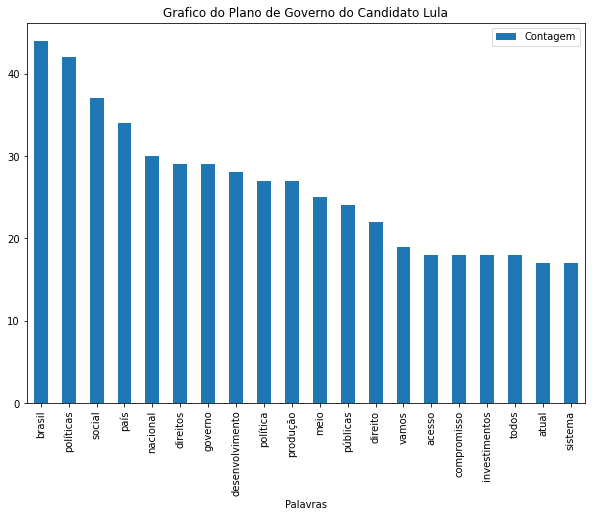

In [ ]:
plotar_grafico(candidatos[7], candidatos[7])

## Candidato Ciro Gomes

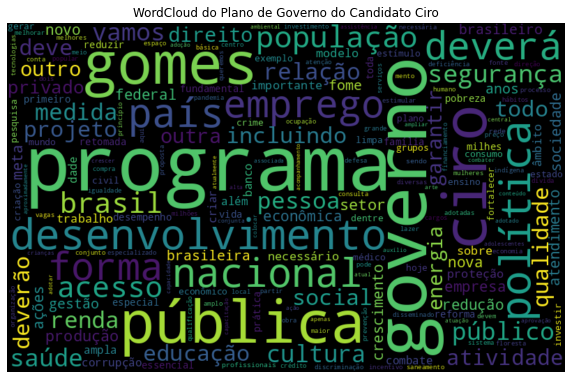

In [ ]:
wordcloud(candidatos[8], candidatos[8])

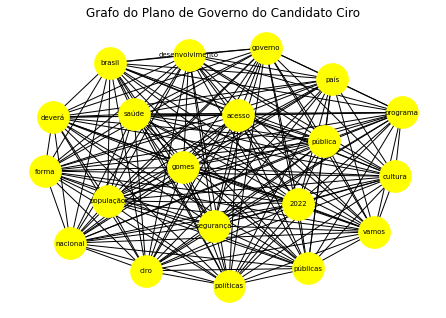

In [ ]:
plotar_grafo(candidatos[8], candidatos[8])

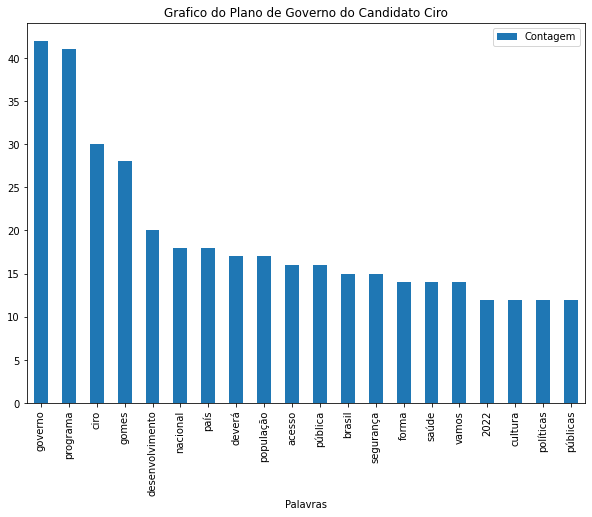

In [ ]:
plotar_grafico(candidatos[8], candidatos[8])

## Candidato Felipe d'Avila

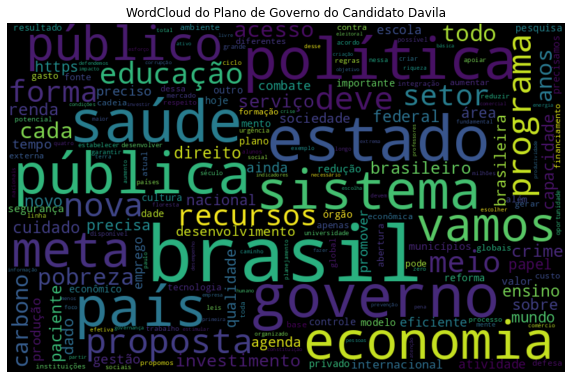

In [ ]:
wordcloud(candidatos[9], candidatos[9])

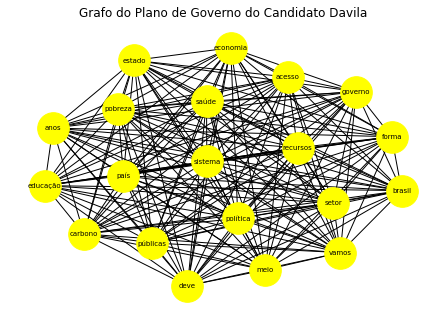

In [ ]:
plotar_grafo(candidatos[9], candidatos[9])

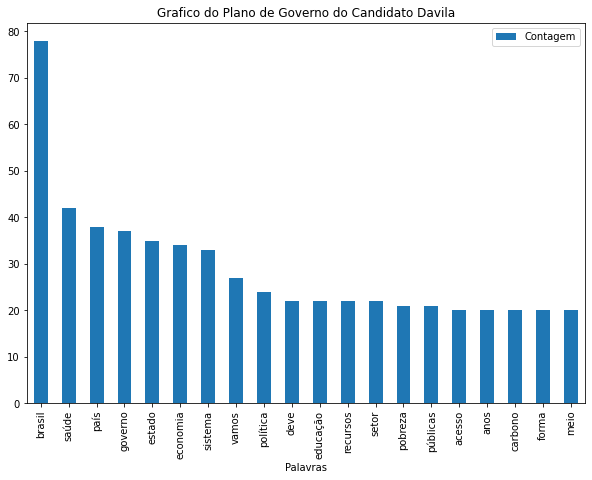

In [ ]:
plotar_grafico(candidatos[9], candidatos[9])

## Candidato Pablo Marçal (teve sua candidatura barrada pelo TSE em 6 de setembro de 2022)

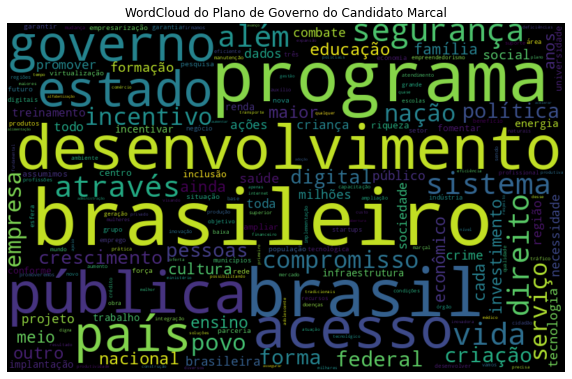

In [ ]:
wordcloud(candidatos[10], candidatos[10])

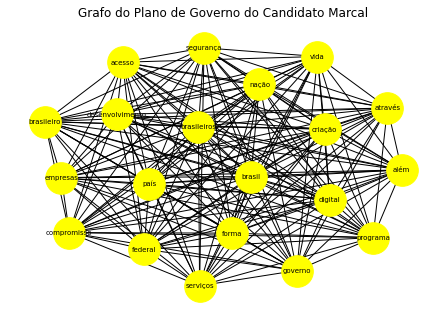

In [ ]:
plotar_grafo(candidatos[10], candidatos[10])

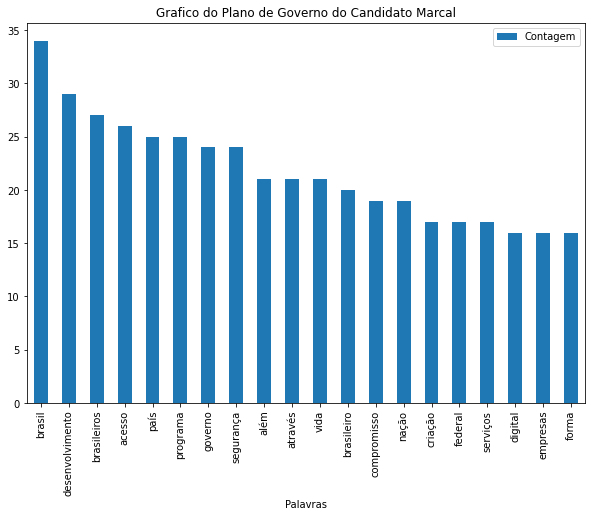

In [ ]:
plotar_grafico(candidatos[10], candidatos[10])



## Candidata Sofia Manzano


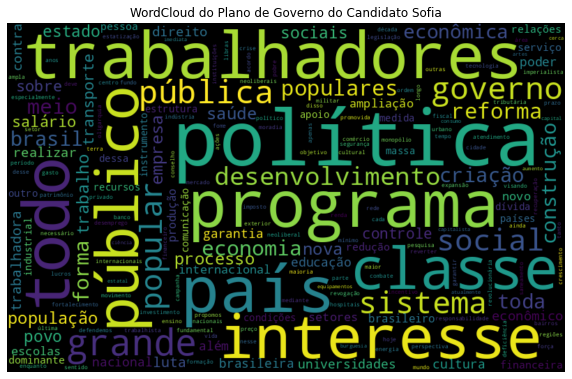

In [ ]:
wordcloud(candidatos[11], candidatos[11])

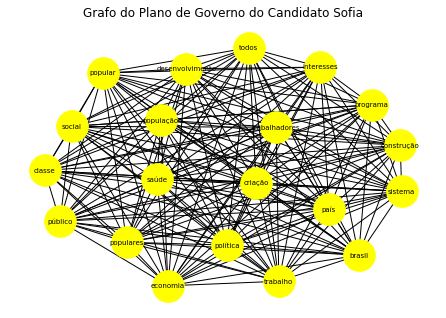

In [ ]:
plotar_grafo(candidatos[11], candidatos[11])

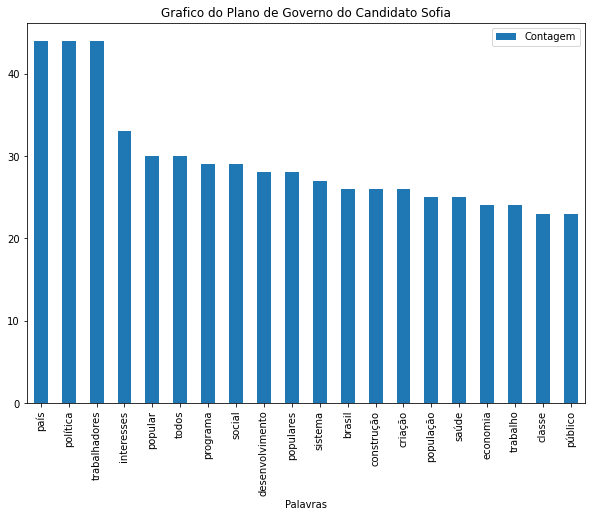

In [ ]:
plotar_grafico(candidatos[11], candidatos[11])

## Gráficos com as informações conjuntas de todos os candidatos a presidência em 2022

### Wordcloud dos arquivos .csv:

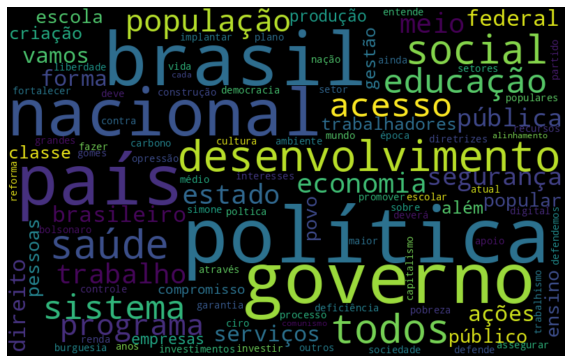

In [ ]:
wordcloud_geral_csv()

### Wordcloud dos arquivos em pdf

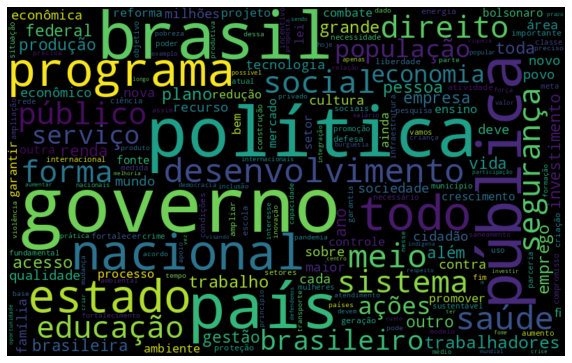

In [ ]:
wordcloud_geral_pdf()

### Comparativo das 10 palavras mais mencionadas entre todos os candidatos selecionados:

In [ ]:
grafico_barras_geral()

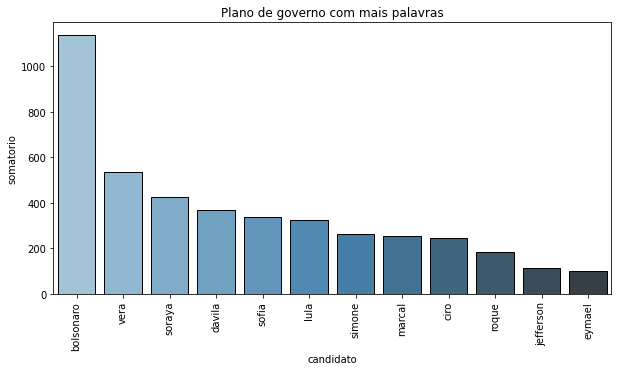

In [ ]:
grafico_somatorio()

O plano de governo com mais palavras foi o de Bolsonaro, seguido de Vera Lúcia e Soraya Tronicke. Os menores planos de governo foram o de Eymael, Roberto Jefferson e Roque.

# Conclusão: 

### Dentre os 12 candidatos para presidência em 2022 seleciados para essa análise, vamos ressaltar as 3 palavras mais utilizadas em seus planos de governo e destacar alguns pontos:

### a)	Felipe d’Avila - as palavras mais ditas foram Brasil, saúde e país. Com destaque para a palavra “economia” em sexto lugar, tema muito recorrente para esse candidato que defende veementemente a privatização de diversos setores do Brasil.

### b)	Simone Tebet - as palavras mais ditas foram: Nacional, governo e promover. Com destaque para a palavra “renda”, termo que não apareceu em nenhum top 10 dos demais planos de governo aqui apresentados.

### c)	Eymael - as palavras mais ditas foram: Federal, nacional e desenvolvimento. Achei interessante não ter aparecido nenhum termo sobre religião ou cristianismo, pauta muito presente na apresentação desse candidato ao longo dos anos.

### d)	 Roque - as palavras mais ditas foram: Nacional, garantia e popular. Cabe destacar o termo “controle” em sétimo lugar, sendo o único candidato que apareceu essa palavra em seu top 10.

### e)	Sofia Manzano - as palavras mais ditas foram: País, política e trabalhadores. Cabe destacar as palavras “popular”, “todos”, “social” e “populares” (em quinto, sexto, oitavo e décimo lugar). Portanto há uma grande recorrência desse assunto para essa candidata.

### f)	Jair Bolsonar - as palavras mais ditas foram: Governo (em primeiro disparado, com 258 ocorrência) provavelmente por se retratar ao próprio governo e suas conquistas, seguido de Brasil e plano. Interessante verificar que a palavra “educação” se quer aparece entre as 10 mais mencionadas em seu plano de governo.

### g)	Soraya Tronicke - as palavras mais ditas foram: Nacional, ações e Brasil. Cabe destacar o investimento “investir”, única candidata com essa palavra em seu top 10 mais mencionadas.

### h)	Vera Lúcia - as palavras mais ditas foram: Trabalhadores (em primeiro isoladamente com 111 menções), seguido de país e burguesia. Interessante as palavras “burguesia”, “contra”, “grandes” “empresas” entre as mais mencionadas, uma vez que a candidata é do PSTU (Partido Socialista dos Trabalhadores Unificado), tais temas são muito recorrentes.

### i)	Luís Inácio Lula da Silva - as palavras mais ditas foram: Brasil, políticas e social. Interessante verificar que, no plano de governo de Lula, as dez palavras mais mencionadas ficaram bem balanceadas (tendo a primeira palavra com 44 menções e a décima com 27). Há um grande foco em políticas públicas e desenvolvimento nacional.

### j)	Pablo Marçal - as palavras mais ditas foram: Brasil, desenvolvimento e brasileiros. Foi o único candidato com a palavra "acesso" em seu top 10.

### k)	Ciro Gomes - as palavras mais ditas foram: governo, programa e Ciro. Cabe destacar que seu sobrenome (Gomes) ficou em quarto lugar.

### l)	Roberto Jefferson - as palavras mais ditas foram: Mundo, Brasil e Estado. Esse foi o único candidato com a palavra Mundo em seu top 10, e ainda em primeiro lugar. A palavra “liberdade” ficou em oitavo lugar, tema muito recorrente em candidatos da extrema direita brasileira. 
